# The green growth Solow model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from scipy import linalg
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

Så laver vi lidt tekst

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

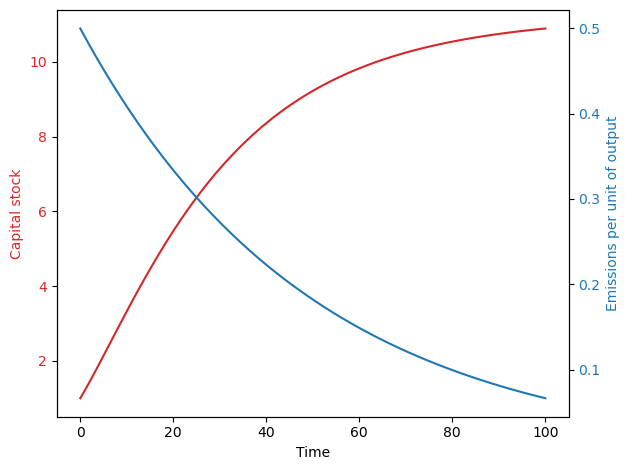

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the green Solow model
s = 0.3     # savings rate
n = 0.02    # population growth rate
delta = 0.05    # capital depreciation rate
alpha = 0.4     # capital share of output
A = 1       # total factor productivity
k0 = 1      # initial capital stock
T = 100     # number of time periods
g = 0.02    # technological progress rate
b = 0.1     # energy efficiency parameter
e0 = 0.5    # initial emissions per unit of output

# Define the function that describes the green Solow model
def green_solow_model(k, s, n, delta, alpha, A, g, b, e):
    return s*A*(k**alpha)*(1-b*e) - (delta+n)*k

# Create arrays to store the values of k and e over time
k = np.zeros(T+1)
k[0] = k0
e = np.zeros(T+1)
e[0] = e0

# Iterate the green Solow model over time
for t in range(T):
    k[t+1] = k[t] + green_solow_model(k[t], s, n, delta, alpha, A, g, b, e[t])
    e[t+1] = e[t]*(1-g)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Capital stock', color=color)
ax1.plot(range(T+1), k, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Emissions per unit of output', color=color)
ax2.plot(range(T+1), e, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 